# Pointplot 详解

Pointplot（点图）是数据可视化中的一种图表类型，主要用于展示数值变量的集中趋势（通常是均值）及其变异程度（如置信区间）。它是Seaborn库中提供的一种高级绘图函数，基于Matplotlib构建。

## 基本概念

Pointplot通过点和线条来表示：
- **点**：表示数据的集中趋势（默认是均值）
- **垂直线**：表示该估计值的置信区间（默认95%置信区间）

## 主要特点

1. **分类变量比较**：特别适合展示一个或多个分类变量与连续变量之间的关系
2. **趋势展示**：通过连接点的线条可以清晰展示不同类别间的趋势变化
3. **误差表示**：内置显示估计值的置信区间
4. **多变量支持**：可以通过颜色区分不同的分类变量

## 基本语法

```python
seaborn.pointplot(
    x=None, 
    y=None, 
    hue=None, 
    data=None, 
    order=None, 
    hue_order=None, 
    estimator=<function mean>, 
    ci=95, 
    n_boot=1000, 
    units=None, 
    markers='o', 
    linestyles='-', 
    dodge=False, 
    join=True, 
    scale=1, 
    orient=None, 
    color=None, 
    palette=None, 
    errwidth=None, 
    capsize=None, 
    ax=None, 
    **kwargs
)
```

## 主要参数解释

- **x, y, hue**：指定数据中的变量名，x和y是坐标轴变量，hue用于分组
- **data**：DataFrame格式的数据集
- **estimator**：用于聚合统计的函数，默认为numpy.mean（均值）
- **ci**：置信区间大小，可以是[0,100]间的数值或"sd"（标准差）或None
- **markers**：点的样式，默认为圆圈'o'
- **linestyles**：连接线的样式
- **dodge**：当使用hue分组时，是否将点分开显示
- **capsize**：置信区间两端横线的长度

## 使用示例

### 基础示例
```python
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据集
tips = sns.load_dataset("tips")

# 创建基本pointplot
sns.pointplot(x="day", y="total_bill", data=tips)
plt.show()
```

### 添加分组变量
```python
sns.pointplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()
```

### 更改聚合函数和置信区间
```python
sns.pointplot(x="day", y="total_bill", data=tips, 
              estimator=sum, ci="sd")  # 使用总和和标准差
plt.show()
```

## 适用场景

1. **时间序列比较**：展示不同时间点的指标变化
2. **分组比较**：比较不同组别间的均值差异
3. **交互作用分析**：展示两个分类变量对连续变量的交互影响
4. **实验前后对比**：展示处理前后的效果差异

## 优缺点

**优点**：
- 简洁直观地展示集中趋势
- 内置误差表示（置信区间）
- 支持多变量比较
- 自动进行统计聚合

**缺点**：
- 不展示原始数据分布
- 当数据点很多时可能显得混乱
- 对于偏态分布数据，均值可能不是最佳代表

## 与类似图表的区别

1. **与Barplot的区别**：
   - Barplot用条形高度表示数值
   - Pointplot更强调趋势变化而非绝对数值

2. **与Lineplot的区别**：
   - Lineplot更适合连续x变量
   - Pointplot更强调离散点上的估计值

3. **与Boxplot/Violinplot的区别**：
   - 后两者展示更多数据分布信息
   - Pointplot更简洁但信息量较少

Pointplot是探索性数据分析中非常有用的工具，特别适合在学术研究和商业报告中展示组间比较结果。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

这段代码展示了如何使用Seaborn库创建结合散点图(stripplot)和点图(pointplot)的复合可视化图表，以展示鸢尾花数据集(Iris dataset)中不同物种的各个测量特征的分布情况。

,species,measurement,value
43,setosa,sepal_length,5.0
502,versicolor,petal_width,1.5
4,setosa,sepal_length,5.0
531,versicolor,petal_width,1.0
14,setosa,sepal_length,5.8
206,versicolor,sepal_width,3.3
242,versicolor,sepal_width,2.6
372,versicolor,petal_length,4.9
150,setosa,sepal_width,3.5
250,virginica,sepal_width,3.3


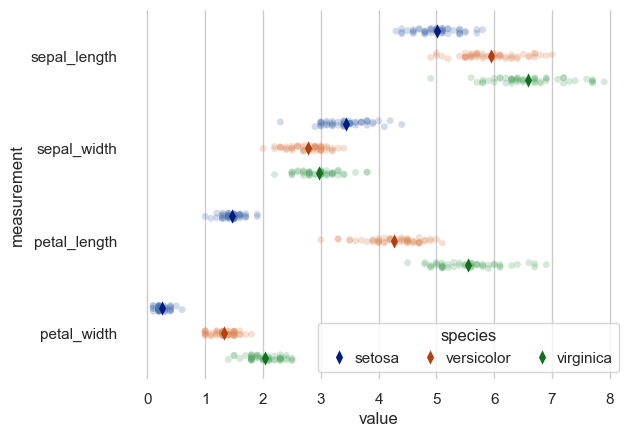

In [21]:
sns.set_theme(style="whitegrid")
# 加载内置的鸢尾花数据集，包含150朵鸢尾花的测量数据(萼片长度、萼片宽度、花瓣长度、花瓣宽度)和种类
iris = pd.read_csv("seaborn-data/iris.csv")

# 将数据从"宽格式"转换为"长格式"(tidy data)
# "Melt" the dataset to "long-form" or "tidy" representation
iris = iris.melt(id_vars="species", var_name="measurement")
display(iris.sample(10))

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=iris, x="value", y="measurement", hue="species",
    dodge=True, alpha=.25, zorder=1, legend=False,
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=iris, x="value", y="measurement", hue="species",
    dodge=.8 - .8 / 3,
    palette="dark", errorbar=None,
    markers="d", markersize=4, linestyle="none",
)

# Improve the legend
sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0,
)